In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models
import os

In [7]:
train_data_path ='FacialExpressionImgs/images/train/'
val_data_path = 'FacialExpressionImgs/images/validation/'

In [8]:
tot=0
for expression in os.listdir(train_data_path):
    print(expression, " ",len(os.listdir(train_data_path + expression)))
    tot= tot + len(os.listdir(train_data_path + expression))
print("Total images :",tot)

angry   3993
disgust   436
fear   4103
happy   7164
neutral   4982
sad   4938
surprise   3205
Total images : 28821


In [9]:
emotions = []
tot=0
for expression in os.listdir(val_data_path):
    print(expression, " ",len(os.listdir(val_data_path + expression)))
    data = [expression]
    tot= tot + len(os.listdir(val_data_path + expression))
    emotions.append(data)
print("Total images :",tot)

angry   960
disgust   111
fear   1018
happy   1825
neutral   1216
sad   1139
surprise   797
Total images : 7066


In [10]:
emotions

[['angry'],
 ['disgust'],
 ['fear'],
 ['happy'],
 ['neutral'],
 ['sad'],
 ['surprise']]

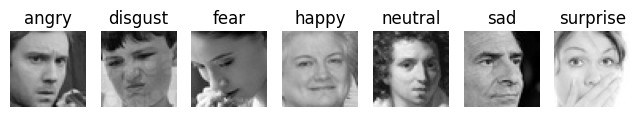

In [11]:
i=1
plt.figure(figsize=(8,8))
for expression in os.listdir(train_data_path):
    image = load_img((train_data_path + expression) + '/' + os.listdir(train_data_path + expression)[0])
    plt.subplot(1,7,i)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    i+=1

In [12]:
train_data_gen = ImageDataGenerator()

train_dataset = train_data_gen.flow_from_directory(
    train_data_path,
    shuffle=True,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)

Found 28821 images belonging to 7 classes.


In [13]:
val_data_gen = ImageDataGenerator()

val_dataset = val_data_gen.flow_from_directory(
    val_data_path,
    shuffle=False,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)

Found 7066 images belonging to 7 classes.


In [14]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

model.summary()


C:\Users\RENU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,311,047 (8.82 MB)

 Trainable params: 2,308,359 (8.81 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_dataset, validation_data=val_dataset, epochs=50, batch_size=128, verbose=1)

C:\Users\RENU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


In [ ]:
model.save('E:/ML projects/Face Emotion detection/model.keras')

In [ ]:
import cv2

In [ ]:
image = cv2.imread('Images to predict/1.jpg')[:,:,0]
image = cv2.resize(image, (48,48))
image = np.invert(np.array([image]))

In [ ]:
output = model.predict(image)

In [ ]:
np.argmax(output)

In [ ]:
data = emotions[np.argmax(output)]

In [ ]:
data[0]